# SVD

In [7]:
import pandas as pd

In [8]:
%pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [50]:
df = pd.read_csv('./REC_ALS_Facility.csv')

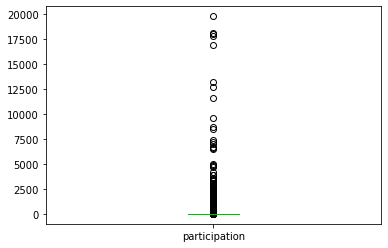

In [51]:
df.participation.plot.box()

In [45]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(1,5))

df[['participation']] = min_max_scaler.fit_transform(df[['participation']])

In [46]:
df.rename(columns={'facilityid': 'item', 'participation': 'rating', 'cleanzip': 'user'}, inplace=True)

In [47]:
df['user'] = pd.to_numeric(df['user'], downcast='integer')

In [48]:
df.head()

,item,user,rating
0,252494,99709.0,1.000404
1,252494,99706.0,1.000404
2,252494,99709.0,1.000000
3,252494,99709.0,1.000202
4,252494,84401.0,1.000808


In [49]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

reader = Reader()
data = Dataset.load_from_df(df, reader)

algo = SVD()

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    nan     nan     nan     nan     nan     
MAE (testset)     nan     nan     nan     nan     nan     
Fit time          114.87  117.21  116.85  116.31  1.03    
Test time         22.52   13.56   14.26   16.78   4.07    


{'test_rmse': array([nan, nan, nan]),
 'test_mae': array([nan, nan, nan]),
 'fit_time': (114.87264752388, 117.21020555496216, 116.84878158569336),
 'test_time': (22.515440464019775, 13.557408094406128, 14.261836290359497)}